# Importing required Packages

In [42]:
import numpy as np
import pandas as pd

import torch 
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision

import matplotlib.pyplot as plt


# Loading Dataset

In [44]:
train = pd.read_csv(r"C:\Users\Tanya srivastava\Desktop\train_digits.csv")
X_test = pd.read_csv(r"C:\Users\Tanya srivastava\Desktop\test_digits.csv")


In [45]:
# sub = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

In [46]:
train.shape

(42000, 785)

In [47]:
from sklearn.model_selection import train_test_split

x_train, y_train = train.iloc[:, 1:].values , train.iloc[:, 0].values
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = .25)
x_test = X_test.values

In [48]:
x_train.shape

(31500, 784)

# Plotting Images

In [49]:
def plotting(x,y,index):
    plt.imshow(x[index])
    plt.xlabel(y[index])

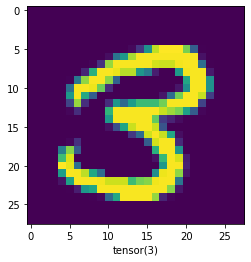

In [76]:
plotting(x_train.reshape((31500,28,28)), y_train, 2)

# Defining Hyperparameters

In [71]:
BATCH_SIZE = 256
LR = 0.001
epochs = 10
n_classes = 10
in_channels = 1

# Normalising Dataset

In [52]:
x_train = x_train/255
x_val = x_val/255
x_test = x_test/255

In [53]:
x_train = x_train.reshape(-1,28,28)
x_val = x_val.reshape(-1,28,28)
x_test = x_test.reshape(-1,28,28)


# Creating Batches

In [54]:
x_train = torch.from_numpy(x_train).type(torch.float32).unsqueeze(1)

x_val = torch.from_numpy(x_val).type(torch.float32).unsqueeze(1)
x_test = torch.from_numpy(x_test).type(torch.float32).unsqueeze(1)
y_train = torch.from_numpy(y_train)
y_val = torch.from_numpy(y_val)
train_ds = TensorDataset(x_train, y_train)
val_ds = TensorDataset(x_val, y_val)
train_loader = DataLoader(train_ds, batch_size = BATCH_SIZE, shuffle = True)
val_loader = DataLoader(val_ds, batch_size = BATCH_SIZE, shuffle = False)

# CNN Model

In [55]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels =1, out_channels =6, kernel_size = (3,3), stride=(1,1), padding=(1,1))

        self.pool = nn.MaxPool2d(kernel_size= (2,2), stride= (2,2))

        self.conv2 = nn.Conv2d(in_channels = 6, out_channels =16, kernel_size = (3,3), stride=(1,1), padding=(1,1))
        self.fc1 = nn.Linear(16*7*7, 120)

        self.fc2 = nn.Linear(120, 80)
        self.fc3 = nn.Linear(80, 10)
    
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        #print(x.shape)

        x = self.pool(F.relu(self.conv2(x)))
        #print(x.shape)

        x = x.view(-1, 16*7*7)
        #print( x.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    

In [56]:
model = ConvNet()

In [77]:
print(model)

ConvNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=80, bias=True)
  (fc3): Linear(in_features=80, out_features=10, bias=True)
)


# Loss and optimizer

In [57]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = LR)

# Training Network

In [78]:
n_total_steps = len(train_loader)

for epoch in range (epochs):
    for i, (images,labels) in enumerate(train_loader):
       
        #forward
        outputs = model(images)
        loss = loss_fn(outputs,labels)
        
        #backward
        optimizer.zero_grad()
        loss.backward() #Backpropagate the prediction loss with a call to loss.backwards()
        
        optimizer.step() # to adjust the gradients received from backward pass
       
        print (f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

124
Epoch [1/10], Step [1/124], Loss: 0.0285
Epoch [1/10], Step [2/124], Loss: 0.0504
Epoch [1/10], Step [3/124], Loss: 0.0313
Epoch [1/10], Step [4/124], Loss: 0.0542
Epoch [1/10], Step [5/124], Loss: 0.0358
Epoch [1/10], Step [6/124], Loss: 0.0352
Epoch [1/10], Step [7/124], Loss: 0.0365
Epoch [1/10], Step [8/124], Loss: 0.0941
Epoch [1/10], Step [9/124], Loss: 0.0505
Epoch [1/10], Step [10/124], Loss: 0.0602
Epoch [1/10], Step [11/124], Loss: 0.0585
Epoch [1/10], Step [12/124], Loss: 0.0471
Epoch [1/10], Step [13/124], Loss: 0.0403
Epoch [1/10], Step [14/124], Loss: 0.0860
Epoch [1/10], Step [15/124], Loss: 0.0531
Epoch [1/10], Step [16/124], Loss: 0.0464
Epoch [1/10], Step [17/124], Loss: 0.0513
Epoch [1/10], Step [18/124], Loss: 0.1077
Epoch [1/10], Step [19/124], Loss: 0.0292
Epoch [1/10], Step [20/124], Loss: 0.0387
Epoch [1/10], Step [21/124], Loss: 0.0428
Epoch [1/10], Step [22/124], Loss: 0.0589
Epoch [1/10], Step [23/124], Loss: 0.0400
Epoch [1/10], Step [24/124], Loss: 0.06

Epoch [2/10], Step [73/124], Loss: 0.0495
Epoch [2/10], Step [74/124], Loss: 0.0420
Epoch [2/10], Step [75/124], Loss: 0.0232
Epoch [2/10], Step [76/124], Loss: 0.0640
Epoch [2/10], Step [77/124], Loss: 0.0653
Epoch [2/10], Step [78/124], Loss: 0.0363
Epoch [2/10], Step [79/124], Loss: 0.0778
Epoch [2/10], Step [80/124], Loss: 0.0368
Epoch [2/10], Step [81/124], Loss: 0.0317
Epoch [2/10], Step [82/124], Loss: 0.0845
Epoch [2/10], Step [83/124], Loss: 0.0484
Epoch [2/10], Step [84/124], Loss: 0.0230
Epoch [2/10], Step [85/124], Loss: 0.0412
Epoch [2/10], Step [86/124], Loss: 0.0487
Epoch [2/10], Step [87/124], Loss: 0.0556
Epoch [2/10], Step [88/124], Loss: 0.0119
Epoch [2/10], Step [89/124], Loss: 0.0501
Epoch [2/10], Step [90/124], Loss: 0.0353
Epoch [2/10], Step [91/124], Loss: 0.0609
Epoch [2/10], Step [92/124], Loss: 0.0263
Epoch [2/10], Step [93/124], Loss: 0.0691
Epoch [2/10], Step [94/124], Loss: 0.0819
Epoch [2/10], Step [95/124], Loss: 0.0393
Epoch [2/10], Step [96/124], Loss:

Epoch [4/10], Step [23/124], Loss: 0.0507
Epoch [4/10], Step [24/124], Loss: 0.0305
Epoch [4/10], Step [25/124], Loss: 0.0175
Epoch [4/10], Step [26/124], Loss: 0.0409
Epoch [4/10], Step [27/124], Loss: 0.0263
Epoch [4/10], Step [28/124], Loss: 0.0152
Epoch [4/10], Step [29/124], Loss: 0.0363
Epoch [4/10], Step [30/124], Loss: 0.0209
Epoch [4/10], Step [31/124], Loss: 0.0587
Epoch [4/10], Step [32/124], Loss: 0.0534
Epoch [4/10], Step [33/124], Loss: 0.0098
Epoch [4/10], Step [34/124], Loss: 0.0443
Epoch [4/10], Step [35/124], Loss: 0.0197
Epoch [4/10], Step [36/124], Loss: 0.0497
Epoch [4/10], Step [37/124], Loss: 0.0170
Epoch [4/10], Step [38/124], Loss: 0.0358
Epoch [4/10], Step [39/124], Loss: 0.0331
Epoch [4/10], Step [40/124], Loss: 0.0592
Epoch [4/10], Step [41/124], Loss: 0.0353
Epoch [4/10], Step [42/124], Loss: 0.0303
Epoch [4/10], Step [43/124], Loss: 0.0339
Epoch [4/10], Step [44/124], Loss: 0.0612
Epoch [4/10], Step [45/124], Loss: 0.0225
Epoch [4/10], Step [46/124], Loss:

Epoch [5/10], Step [95/124], Loss: 0.0234
Epoch [5/10], Step [96/124], Loss: 0.0278
Epoch [5/10], Step [97/124], Loss: 0.0156
Epoch [5/10], Step [98/124], Loss: 0.0274
Epoch [5/10], Step [99/124], Loss: 0.0378
Epoch [5/10], Step [100/124], Loss: 0.0533
Epoch [5/10], Step [101/124], Loss: 0.0087
Epoch [5/10], Step [102/124], Loss: 0.0243
Epoch [5/10], Step [103/124], Loss: 0.0753
Epoch [5/10], Step [104/124], Loss: 0.0298
Epoch [5/10], Step [105/124], Loss: 0.0338
Epoch [5/10], Step [106/124], Loss: 0.0196
Epoch [5/10], Step [107/124], Loss: 0.0141
Epoch [5/10], Step [108/124], Loss: 0.0257
Epoch [5/10], Step [109/124], Loss: 0.0306
Epoch [5/10], Step [110/124], Loss: 0.0756
Epoch [5/10], Step [111/124], Loss: 0.0275
Epoch [5/10], Step [112/124], Loss: 0.0402
Epoch [5/10], Step [113/124], Loss: 0.0424
Epoch [5/10], Step [114/124], Loss: 0.0321
Epoch [5/10], Step [115/124], Loss: 0.0237
Epoch [5/10], Step [116/124], Loss: 0.0467
Epoch [5/10], Step [117/124], Loss: 0.0064
Epoch [5/10], St

Epoch [7/10], Step [44/124], Loss: 0.0309
Epoch [7/10], Step [45/124], Loss: 0.0319
Epoch [7/10], Step [46/124], Loss: 0.0114
Epoch [7/10], Step [47/124], Loss: 0.0385
Epoch [7/10], Step [48/124], Loss: 0.0404
Epoch [7/10], Step [49/124], Loss: 0.0306
Epoch [7/10], Step [50/124], Loss: 0.0127
Epoch [7/10], Step [51/124], Loss: 0.0235
Epoch [7/10], Step [52/124], Loss: 0.0955
Epoch [7/10], Step [53/124], Loss: 0.0351
Epoch [7/10], Step [54/124], Loss: 0.0091
Epoch [7/10], Step [55/124], Loss: 0.0215
Epoch [7/10], Step [56/124], Loss: 0.0290
Epoch [7/10], Step [57/124], Loss: 0.0246
Epoch [7/10], Step [58/124], Loss: 0.0137
Epoch [7/10], Step [59/124], Loss: 0.0081
Epoch [7/10], Step [60/124], Loss: 0.0372
Epoch [7/10], Step [61/124], Loss: 0.0410
Epoch [7/10], Step [62/124], Loss: 0.0133
Epoch [7/10], Step [63/124], Loss: 0.0199
Epoch [7/10], Step [64/124], Loss: 0.0288
Epoch [7/10], Step [65/124], Loss: 0.0449
Epoch [7/10], Step [66/124], Loss: 0.0386
Epoch [7/10], Step [67/124], Loss:

Epoch [8/10], Step [116/124], Loss: 0.0530
Epoch [8/10], Step [117/124], Loss: 0.0189
Epoch [8/10], Step [118/124], Loss: 0.0482
Epoch [8/10], Step [119/124], Loss: 0.0128
Epoch [8/10], Step [120/124], Loss: 0.0371
Epoch [8/10], Step [121/124], Loss: 0.0495
Epoch [8/10], Step [122/124], Loss: 0.0342
Epoch [8/10], Step [123/124], Loss: 0.0163
Epoch [8/10], Step [124/124], Loss: 0.0002
Epoch [9/10], Step [1/124], Loss: 0.0167
Epoch [9/10], Step [2/124], Loss: 0.0151
Epoch [9/10], Step [3/124], Loss: 0.0389
Epoch [9/10], Step [4/124], Loss: 0.0115
Epoch [9/10], Step [5/124], Loss: 0.0463
Epoch [9/10], Step [6/124], Loss: 0.0135
Epoch [9/10], Step [7/124], Loss: 0.0162
Epoch [9/10], Step [8/124], Loss: 0.0325
Epoch [9/10], Step [9/124], Loss: 0.0159
Epoch [9/10], Step [10/124], Loss: 0.0167
Epoch [9/10], Step [11/124], Loss: 0.0478
Epoch [9/10], Step [12/124], Loss: 0.0186
Epoch [9/10], Step [13/124], Loss: 0.0249
Epoch [9/10], Step [14/124], Loss: 0.0264
Epoch [9/10], Step [15/124], Loss:

Epoch [10/10], Step [64/124], Loss: 0.0230
Epoch [10/10], Step [65/124], Loss: 0.0145
Epoch [10/10], Step [66/124], Loss: 0.0171
Epoch [10/10], Step [67/124], Loss: 0.0225
Epoch [10/10], Step [68/124], Loss: 0.0108
Epoch [10/10], Step [69/124], Loss: 0.0215
Epoch [10/10], Step [70/124], Loss: 0.0087
Epoch [10/10], Step [71/124], Loss: 0.0513
Epoch [10/10], Step [72/124], Loss: 0.0222
Epoch [10/10], Step [73/124], Loss: 0.0059
Epoch [10/10], Step [74/124], Loss: 0.0100
Epoch [10/10], Step [75/124], Loss: 0.0176
Epoch [10/10], Step [76/124], Loss: 0.0345
Epoch [10/10], Step [77/124], Loss: 0.0282
Epoch [10/10], Step [78/124], Loss: 0.0079
Epoch [10/10], Step [79/124], Loss: 0.0119
Epoch [10/10], Step [80/124], Loss: 0.0109
Epoch [10/10], Step [81/124], Loss: 0.0268
Epoch [10/10], Step [82/124], Loss: 0.0105
Epoch [10/10], Step [83/124], Loss: 0.0256
Epoch [10/10], Step [84/124], Loss: 0.0076
Epoch [10/10], Step [85/124], Loss: 0.0069
Epoch [10/10], Step [86/124], Loss: 0.0081
Epoch [10/1

# Finding Accuracy

In [59]:
def check_acc (loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():
        for x, y in loader:
            outputs = model(x)
            _, pred = outputs.max(1)
            num_correct += (pred==y).sum()
            num_samples += pred.size(0)
            print(f'Got {num_correct}/{num_samples} with accuracy {float(num_correct/float(num_samples)*100):.2f}')
        
    model.train()

In [60]:
check_acc(train_loader, model)

Got 253/256 with accuracy 98.83
Got 505/512 with accuracy 98.63
Got 756/768 with accuracy 98.44
Got 1009/1024 with accuracy 98.54
Got 1262/1280 with accuracy 98.59
Got 1514/1536 with accuracy 98.57
Got 1764/1792 with accuracy 98.44
Got 2014/2048 with accuracy 98.34
Got 2268/2304 with accuracy 98.44
Got 2520/2560 with accuracy 98.44
Got 2770/2816 with accuracy 98.37
Got 3019/3072 with accuracy 98.27
Got 3272/3328 with accuracy 98.32
Got 3525/3584 with accuracy 98.35
Got 3778/3840 with accuracy 98.39
Got 4031/4096 with accuracy 98.41
Got 4284/4352 with accuracy 98.44
Got 4536/4608 with accuracy 98.44
Got 4786/4864 with accuracy 98.40
Got 5040/5120 with accuracy 98.44
Got 5291/5376 with accuracy 98.42
Got 5545/5632 with accuracy 98.46
Got 5797/5888 with accuracy 98.45
Got 6050/6144 with accuracy 98.47
Got 6306/6400 with accuracy 98.53
Got 6559/6656 with accuracy 98.54
Got 6810/6912 with accuracy 98.52
Got 7062/7168 with accuracy 98.52
Got 7311/7424 with accuracy 98.48
Got 7562/7680 with a

In [61]:
check_acc(val_loader, model)


Got 242/256 with accuracy 94.53
Got 490/512 with accuracy 95.70
Got 737/768 with accuracy 95.96
Got 987/1024 with accuracy 96.39
Got 1240/1280 with accuracy 96.88
Got 1489/1536 with accuracy 96.94
Got 1738/1792 with accuracy 96.99
Got 1988/2048 with accuracy 97.07
Got 2238/2304 with accuracy 97.14
Got 2488/2560 with accuracy 97.19
Got 2739/2816 with accuracy 97.27
Got 2990/3072 with accuracy 97.33
Got 3240/3328 with accuracy 97.36
Got 3487/3584 with accuracy 97.29
Got 3738/3840 with accuracy 97.34
Got 3991/4096 with accuracy 97.44
Got 4240/4352 with accuracy 97.43
Got 4495/4608 with accuracy 97.55
Got 4744/4864 with accuracy 97.53
Got 4998/5120 with accuracy 97.62
Got 5247/5376 with accuracy 97.60
Got 5498/5632 with accuracy 97.62
Got 5747/5888 with accuracy 97.61
Got 5997/6144 with accuracy 97.61
Got 6248/6400 with accuracy 97.62
Got 6499/6656 with accuracy 97.64
Got 6751/6912 with accuracy 97.67
Got 7003/7168 with accuracy 97.70
Got 7253/7424 with accuracy 97.70
Got 7507/7680 with ac

In [62]:
test_loader=DataLoader(x_test,batch_size=1)

# Generating Submission File

In [67]:
result=pd.DataFrame(columns=['ImageId','Label'])
serial=[]
ans=[]
model.eval()
for s,i in enumerate(test_loader):
    serial.append(s+1)
    ans.append(model(i).argmax())
result['ImageId']=serial    
result['Label']=np.array(ans)

In [68]:
result.to_csv("result.csv",index=False)

In [70]:
result

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
